# Exploración y visualización de datos

El **Análisis Exploratorio de Datos (EDA)** es el proceso inicial de todo proyecto de ciencia de datos. 
 
Nuestro objetivo es **conocer y entender los datos antes de aplicar modelos de Machine Learning**.

En este notebook iremos paso a paso:
1. Cargar los datos y conocer su estructura.
2. Realizar un análisis univariado (cada variable por separado).
3. Realizar un análisis bivariado y multivariado (relaciones entre variables).
4. Observar patrones que nos ayuden a diferenciar especies de Iris.

### 1. Cargar los datos y conocer su estructura

#### Importar bibliotecas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

#### Importar datos

In [3]:
# Primera forma de conectarse con datos en repositorio
from sklearn.datasets import load_iris

iris = load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [4]:
type(iris) # Bunch

sklearn.utils._bunch.Bunch

In [5]:
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


A continuación, tendremos nuestros datos separados.

Imagina los datos como una matriz donde cada fila es una **observación** y cada columna una **característica**:  

$$
X =
\begin{bmatrix}
\color{blue}{\underbrace{5.1}_{x_{11}}} & \color{blue}{\underbrace{3.5}_{x_{12}}} & \color{blue}{\underbrace{1.4}_{x_{13}}} & \color{blue}{\underbrace{0.2}_{x_{14}}} \\
4.9 & 3.0 & 1.4 & 0.2 \\
7.0 & 3.2 & 4.7 & 1.4 \\
6.4 & 3.2 & 4.5 & 1.5 \\
6.3 & 3.3 & 6.0 & 2.5 \\
\vdots & \vdots & \vdots & \vdots \\
\end{bmatrix}
$$

- Cada **fila** corresponde a una **observación** (ej. una flor medida).  
- Cada **columna** corresponde a una **característica** (ej. longitud del sépalo, ancho del sépalo, etc.).  

Podemos anotar explícitamente:  

$$
\underbrace{\begin{bmatrix}
x_{11} & x_{12} & \cdots & x_{1p} \\
x_{21} & x_{22} & \cdots & x_{2p} \\
\vdots & \vdots & \ddots & \vdots \\
x_{n1} & x_{n2} & \cdots & x_{np} \\
\end{bmatrix}}_{\text{Observaciones (filas)}}
\quad
\begin{matrix}
\updownarrow \\
\text{Características (columnas)}
\end{matrix}
$$

In [6]:
X = iris.data   
y = iris.target 

In [7]:
X[:10]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

Y su vector de etiquetas sería:  

$$
y =
\begin{bmatrix}
\text{Setosa} \\
\text{Setosa} \\
\text{Versicolor} \\
\text{Versicolor} \\
\text{Virginica} \\
\vdots \\
\end{bmatrix}
$$

In [8]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

Para trabajar con una forma más cómoda en un formato tabular, convertiremos los datos a un **DataFrame** de pandas.

In [9]:
# Pandas DataFrame
datos = pd.DataFrame(X, columns=iris.feature_names)
datos['y'] = y

In [10]:
datos

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),y
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [11]:
type(datos)

pandas.core.frame.DataFrame

Ver documentación: [DataFrame](https://pandas.pydata.org/docs/reference/frame.html#)

In [ ]:
datos

---

In [12]:
# Segunda forma de conectar nuetros datos
import os
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
#ruta = os.path.join('content', 'drive', 'MyDrive', 'curso-machine-learning-python', 'iris.csv')

In [13]:
ruta = os.path.join('..', '..', 'docs', 'datos', 'iris_.csv')

In [14]:
df = pd.read_csv(ruta)
df

,id,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,1,5.1,3.5,1.4,0.2,setosa
1,2,4.9,3.0,1.4,0.2,setosa
2,3,4.7,3.2,1.3,0.2,setosa
3,4,4.6,3.1,1.5,0.2,setosa
4,5,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,virginica
146,147,6.3,2.5,5.0,1.9,virginica
147,148,6.5,3.0,5.2,2.0,virginica
148,149,6.2,3.4,5.4,2.3,virginica


#### Establecemos un problema

Supongamos que queremos _predecir la especie de una flor Iris_ a partir de las **características** medidas (longitud y ancho del sépalo y del pétalo).

![iris](../_static/iris.png)

En ciencia de datos, este es un problema de **clasificación supervisada**:
- **Supervisada**: porque tenemos las etiquetas (especies) para entrenar el modelo.
- **Clasificación**: porque las etiquetas son categorías (Setosa, Versicolor, Virginica).

#### 1. Explorar datos

##### 🔹 Renombrar columnas

In [15]:
df.rename({
    'sepal length (cm)': 'sepal_l',
    'sepal width (cm)': 'sepal_w',
    'petal length (cm)': 'petal_l',
    'petal width (cm)': 'petal_w',
    'species': 'y'
}, axis=1, inplace=True)


In [16]:
df

,id,sepal_l,sepal_w,petal_l,petal_w,y
0,1,5.1,3.5,1.4,0.2,setosa
1,2,4.9,3.0,1.4,0.2,setosa
2,3,4.7,3.2,1.3,0.2,setosa
3,4,4.6,3.1,1.5,0.2,setosa
4,5,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,virginica
146,147,6.3,2.5,5.0,1.9,virginica
147,148,6.5,3.0,5.2,2.0,virginica
148,149,6.2,3.4,5.4,2.3,virginica


In [17]:
df.head(3)

,id,sepal_l,sepal_w,petal_l,petal_w,y
0,1,5.1,3.5,1.4,0.2,setosa
1,2,4.9,3.0,1.4,0.2,setosa
2,3,4.7,3.2,1.3,0.2,setosa


##### 🔹 Eliminar columnas

#### Ejes en pandas (`axis`)

- **`axis=0`** → hacia abajo ⬇️  
  - Opera *a lo largo de las filas*  
  - Afecta a **columnas**  

- **`axis=1`** → hacia el lado ➡️  
  - Opera *a lo largo de las columnas*  
  - Afecta a **filas**

In [18]:
df.drop('id', axis=1, inplace=True)

#### 🔹 Explorar la dimensión del DataFrame

In [19]:
# Explorar cual es el nombre de las columnas
df.columns

Index(['sepal_l', 'sepal_w', 'petal_l', 'petal_w', 'y'], dtype='object')

In [20]:
# Explorar la dimension del df
df.shape

(150, 5)

#### 🔹 Conteos

In [21]:
df.y.value_counts()

y
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

##### 🔹 Valores faltantes

In [22]:
df.isnull().sum(axis=0)

sepal_l    1
sepal_w    1
petal_l    1
petal_w    0
y          0
dtype: int64

In [23]:
df.dropna(inplace=True)

#### 🔹 Información general del conjunto de datos

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 147 entries, 0 to 149
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   sepal_l  147 non-null    float64
 1   sepal_w  147 non-null    float64
 2   petal_l  147 non-null    float64
 3   petal_w  147 non-null    float64
 4   y        147 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.9+ KB


In [25]:
df.y.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

##### 🔹 Renombrar valores de una columna

In [26]:
df['y'].replace({
    'setosa': 0,
    'versicolor': 1,
    'virginica': 2
}, inplace=True)

##### 🔹 Separar dataframes

In [27]:
df_setosa = df[df.y == 0]
df_versicolor = df[df.y == 1]
df_virginica = df[df.y == 2]

##### 🔹Estadísticas descriptivas

In [28]:
df.describe()

,sepal_l,sepal_w,petal_l,petal_w,y
count,147.000000,147.000000,147.000000,147.000000,147.000000
mean,5.859184,3.063946,3.763946,1.202041,1.000000
std,0.827751,0.432411,1.775516,0.764402,0.819288
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.550000,0.300000,0.000000
50%,5.800000,3.000000,4.400000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


##### 🔹 Tipo de datos

In [29]:
df.dtypes

sepal_l    float64
sepal_w    float64
petal_l    float64
petal_w    float64
y            int64
dtype: object

### 2. Realizar un análisis univariado

Antes de correr cualquier modelo de _Machine Learning_, es imprescindible entender nuestros datos en términos estadísticos, así como visualizarlos para detectar patrones y características importantes.

En ciencia de datos esto se conoce como **Análisis Exploratorio de Datos (EDA)**.

En esta sección, exploraremos dos bibliotecas populares para la visualización de datos en Python: 

* [**Matplotlib**](https://matplotlib.org/)
* [**Seaborn**](https://seaborn.pydata.org/) 

Ambas bibliotecas ofrecen potentes herramientas para crear gráficos, pero tienen diferencias en su enfoque y facilidad de uso.

![](../_static/artists_figure.png)

**Figura 1.** Estructura jerárquica de los objetos en Matplotlib.Imagen tomada del capítulo _"Matplotlib"_ por John D. Hunter, en _The Architecture of Open Source Applications, Volume II._ Disponible en [aosabook.org](https://aosabook.org/en/v2/matplotlib.html), bajo licencia [CC BY 3.0](https://creativecommons.org/licenses/by/3.0/legalcode).

![](../_static/artists_tree.png)

**Figura 2.** Ejemplo visual de un gráfico generado con Matplotlib, con sus componentes principales identificados según la jerarquía de objetos. Imagen tomada del capítulo _"Matplotlib"_ por John D. Hunter, en _The Architecture of Open Source Applications, Volume II._ Disponible en [aosabook.org](https://aosabook.org/en/v2/matplotlib.html), bajo licencia [CC BY 3.0](https://creativecommons.org/licenses/by/3.0/legalcode).

#### 🔹 Histograma

``.hist()`` es una función (método) dentro de`` matplotlib.pyplot``.

Se invoca con paréntesis `()` porque recibe parámetros (``datos``, ``bins``, ``color``, etc.) y genera un gráfico.

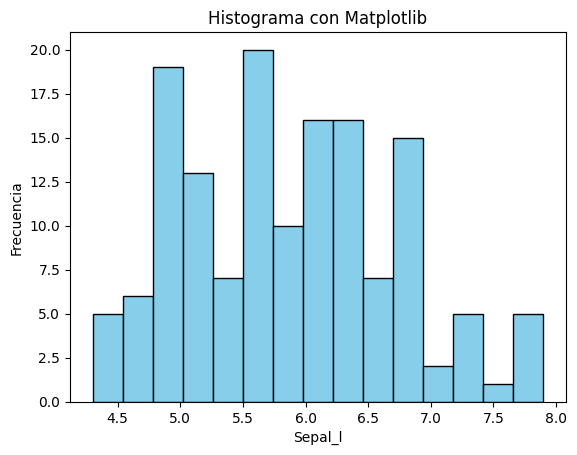

In [30]:
# --- Matplotlib ---
fig, ax = plt.subplots()

ax.hist(df["sepal_l"],
        bins=15,
        color="skyblue",
        edgecolor="black")
        
ax.set_xlabel("Sepal_l")
ax.set_ylabel("Frecuencia")
ax.set_title("Histograma con Matplotlib")

plt.show()

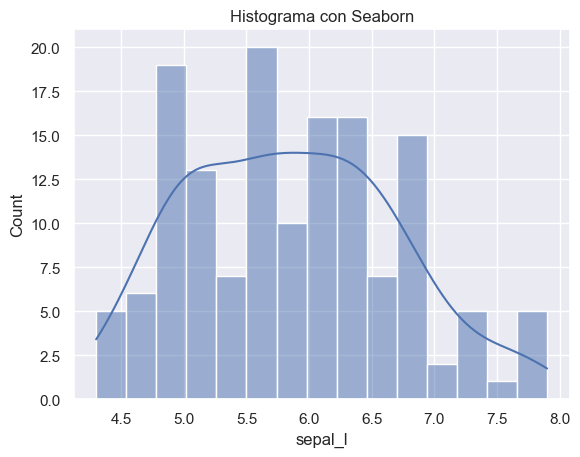

In [31]:
# --- Seaborn ---

sns.set(style="darkgrid")

fig, ax = plt.subplots()

sns.histplot(df["sepal_l"], 
            bins=15, 
            kde=True, 
            ax=ax)
ax.set_title("Histograma con Seaborn")

plt.show()

In [32]:
# Estadísticas básicas
media = df["sepal_l"].mean()
mediana = df["sepal_l"].median()
std = df["sepal_l"].std()

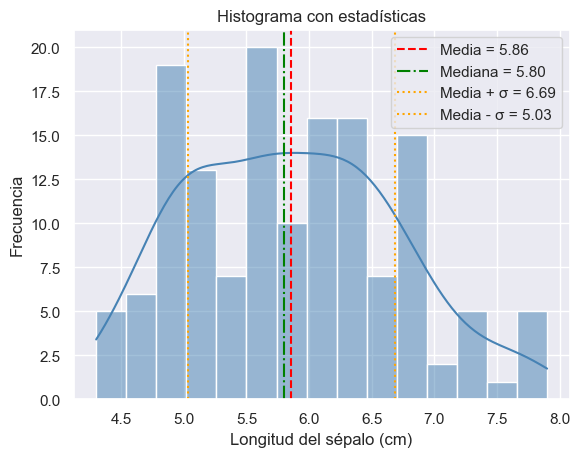

In [33]:
# Crear figura
fig, ax = plt.subplots()

# Histograma con Seaborn
sns.histplot(df["sepal_l"], bins=15, kde=True, ax=ax, color="steelblue")

# Añadir líneas de estadísticas
ax.axvline(media, color="red", linestyle="--", label=f"Media = {media:.2f}")
ax.axvline(mediana, color="green", linestyle="-.", label=f"Mediana = {mediana:.2f}")
ax.axvline(media+std, color="orange", linestyle=":", label=f"Media + σ = {media+std:.2f}")
ax.axvline(media-std, color="orange", linestyle=":", label=f"Media - σ = {media-std:.2f}")

ax.set_title("Histograma con estadísticas")
ax.set_xlabel("Longitud del sépalo (cm)")
ax.set_ylabel("Frecuencia")
ax.legend()

plt.show()

🔎 Diferencias:
- **Matplotlib**: más manual, hay que definir colores, títulos, ejes, etc.

- **Seaborn**: menos código, estilo por defecto más elegante, y añade opcionalmente curva de densidad (`kde=True`).  


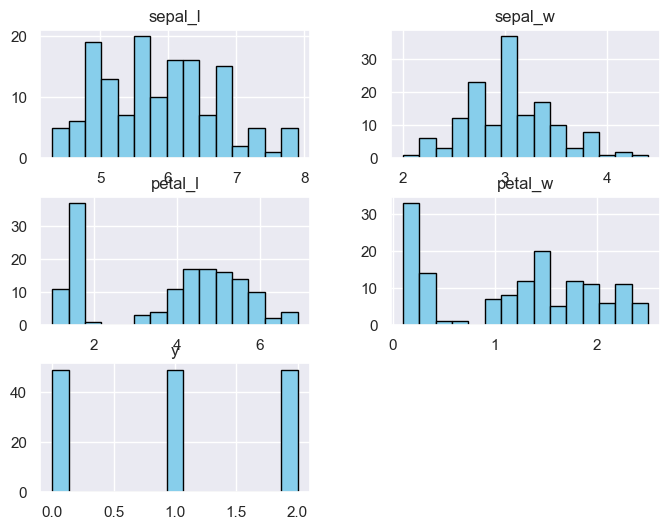

In [34]:
# --- Pandas ---
# Histograma de todas las variables numéricas
df.hist(figsize=(8,6),
        bins=15,
        color="skyblue",
        edgecolor="black")
plt.show()

#### 🔹 Otras representaciones gráficas

Para explorar una variable numérica podemos usar diferentes representaciones gráficas:

1. **Boxplot (diagrama de caja)**  
   - Resume la variable en términos de **mediana, cuartiles y posibles valores atípicos**.  
   - Útil para detectar **asimetrías** y **outliers**.

`.boxplot()`

2. **Histograma**  
   - Divide los datos en intervalos (*bins*) y muestra la **frecuencia de valores** en cada intervalo.  
   - Permite observar la **forma general de la distribución** (simétrica, sesgada, multimodal, etc.).

`.hist()`

3. **KDE (Kernel Density Estimation)**  
   - Es una versión suavizada del histograma que estima la **densidad de probabilidad**.  
   - Ayuda a ver la **tendencia continua** de la distribución sin depender del número de bins.

`kdeplot()`

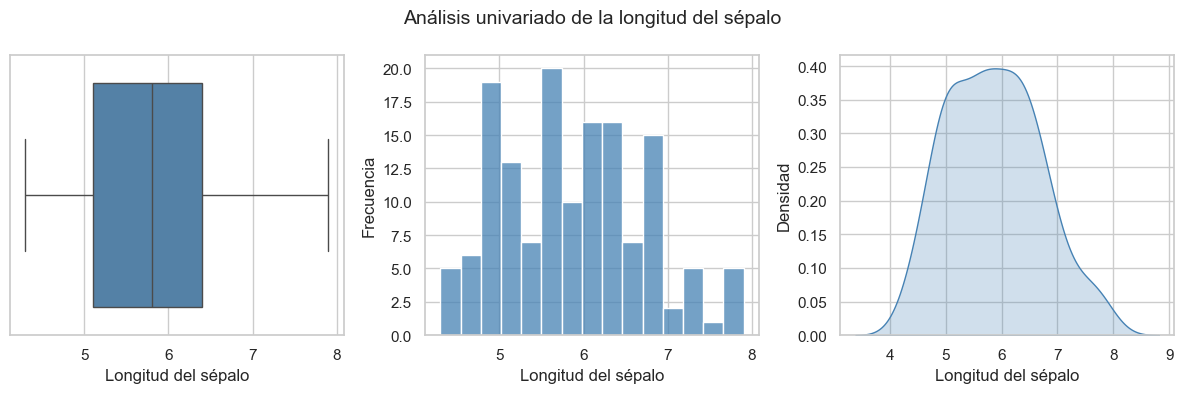

In [35]:
# Ajustamos estilo
sns.set(style="whitegrid") #cambiar por , "whitegrid", "darkgrid", "white", "ticks"

# Crear figura con 3 subplots
fig, axes = plt.subplots(1, 3, figsize=(12,4))

# Boxplot
sns.boxplot(x=df["sepal_l"], ax=axes[0], color="steelblue")
axes[0].set_xlabel("Longitud del sépalo")

# Histograma
sns.histplot(df["sepal_l"], bins=15, ax=axes[1], color="steelblue")
axes[1].set_xlabel("Longitud del sépalo")
axes[1].set_ylabel("Frecuencia")

# KDE (curva de densidad)
sns.kdeplot(df["sepal_l"], ax=axes[2], shade=True, color="steelblue")
axes[2].set_xlabel("Longitud del sépalo")
axes[2].set_ylabel("Densidad")

fig.suptitle("Análisis univariado de la longitud del sépalo", fontsize=14)
plt.tight_layout()
plt.show()

#### 🔹 Análisis estadístico y visual

_¿qué nos dicen estos gráficos?_



![ Iris Setosa](../_static/01-univariate-iris.png)

_Observaciones interesantes:_

- **Sepal length:** distribución con tendencia a distribución normal, concentrada entre 5 y 7 cm, sin outliers fuertes.  
- **Sepal width:** más variable, con algunos valores atípicos en los extremos, menos útil para separar especies.  
- **Petal length:** distribución claramente bimodal, separa bien las especies.  
- **Petal width:** también bimodal y muy discriminante, diferencia claramente entre *setosa* y las demás.  

**Conclusión general:**  
Las variables de los sépalos muestran mayor solapamiento y menor poder de clasificación, mientras que las de los pétalos son las más relevantes para distinguir entre las especies del dataset *Iris*.

### 3. Análisis bivariado y multivariado

En esta sección exploraremos las relaciones entre pares de variables y cómo estas relaciones pueden ayudar a diferenciar las especies de Iris.

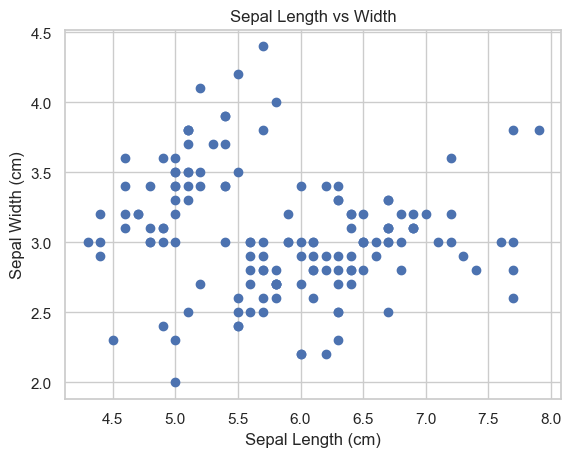

In [45]:
fig, ax = plt.subplots()

ax.scatter(df.sepal_l, df.sepal_w)

ax.set(xlabel='Sepal Length (cm)',
       ylabel='Sepal Width (cm)',
       title='Sepal Length vs Width');

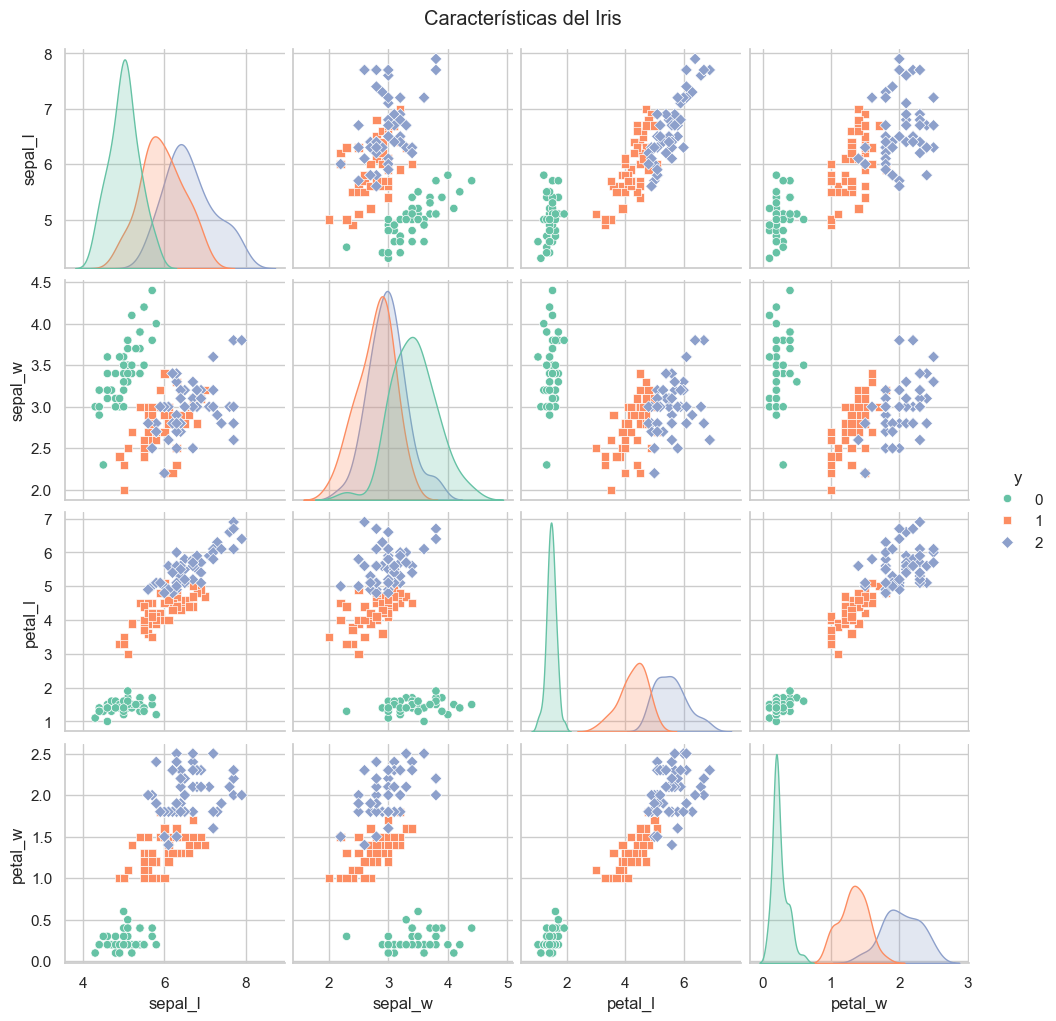

In [36]:
sns.pairplot(df, hue="y", diag_kind="kde", markers=["o", "s", "D"], palette="Set2")
plt.suptitle("Características del Iris", y=1.02)
plt.show()

#### 🔹 Correlación entre variables

### Análisis de correlación

El análisis de correlación dentro del **EDA** permite identificar relaciones entre variables, detectar redundancia (multicolinealidad) y orientar la selección de características antes de entrenar un modelo.

In [37]:
# Calcular la matriz de correlaciones
corr = df.drop(columns="y").corr()
corr

,sepal_l,sepal_w,petal_l,petal_w
sepal_l,1.000000,-0.129480,0.879434,0.826833
sepal_w,-0.129480,1.000000,-0.427249,-0.361165
petal_l,0.879434,-0.427249,1.000000,0.962848
petal_w,0.826833,-0.361165,0.962848,1.000000


**Interpretación de la correlación**

Hay dos aspectos importantes al analizar un mapa de calor de correlación:
1. **La magnitud** (qué tan cerca está de 1 o -1) → indica la **fuerza** de la relación.  
2. **El signo** (positivo o negativo) → indica la **dirección** de la relación.  

- Valores **positivos**: cuando una variable aumenta, la otra también tiende a aumentar.  
- Valores **negativos**: cuando una variable aumenta, la otra tiende a disminuir.

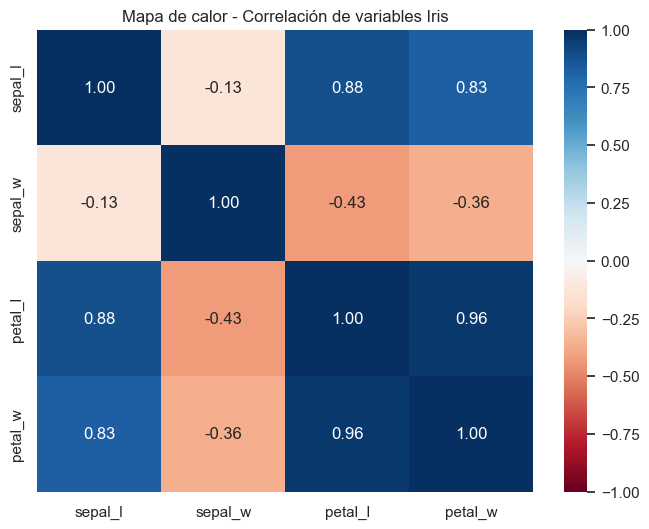

In [38]:
# Crear heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap="RdBu", vmin=-1, vmax=1, fmt=".2f")
plt.title("Mapa de calor - Correlación de variables Iris")
plt.show()

**Conclusiones de heatmap:**

- `petal_l` y `petal_w` → correlación muy alta y positiva (~0.96), aportan información muy similar.  
- `sepal_l` con variables de pétalos → correlación positiva fuerte (0.83–0.88).  
- `sepal_w` → correlaciones débiles o negativas, es la variable más independiente.

### Conclusiones del análisis exploratorio

- El dataset **Iris** está balanceado en cuanto a número de muestras por especie (50 por cada una de las 3 especies).

- Contiene **4 variables numéricas** (longitud y ancho de sépalos y pétalos) y **1 variable categórica** (especie), que será utilizada como **target** del modelo.

- Se observa una **fuerte correlación positiva** entre el largo y el ancho de los pétalos (`petal_l` y `petal_w`), lo que significa que aportan información muy similar.

- A pesar de esta redundancia, las **características de los pétalos** son las más discriminantes para diferenciar especies: incluso por separado, permiten distinguir claramente entre *Setosa*, *Versicolor* y *Virginica*. 

- La especie **Setosa** `0` es la más fácil de identificar, ya que presenta dimensiones significativamente más pequeñas que las demás.

- Las especies **Versicolor** `1` y **Virginica** `2` muestran cierto solapamiento, lo que puede generar confusión en su clasificación.

- Las **características de los pétalos** resultan ser las más relevantes para entrenar modelos de *Machine Learning*, mientras que las de los sépalos aportan menos poder discriminante.

In [39]:
from ydata_profiling import ProfileReport

reporte = ProfileReport(df, title="Reporte Iris", explorative=True)
reporte.to_file("reporte_iris.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 5/5 [00:00<00:00, 234.59it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]